## Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Others benefit from "Gaussian-like" distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance.

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian.


### How can we transform variables so that they follow a Gaussian distribution?

There are a few straightforward methods to transform variables so that they follow a Gaussian distribution. None of them is better than the other, they rather depend on the original distribution of the variables. They are:

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

To understand how the **boxcox** transformation works, please refer to these links:
- http://www.statisticshowto.com/box-cox-transformation/
- http://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm
- http://onlinestatbook.com/2/transformations/box-cox.html


In this notebook I will demonstrate all the transformations on the same variables for comparison, using the titanic dataset.

## Titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

import pylab 
import scipy.stats as stats

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### Fill missing data with random sample

In [3]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [4]:
# fill na
data['Age'] = impute_na(data, 'Age')

## Age
### Original distribution

To visualise the distribution of the variable, Age in this case, we plot a histogram to visualise a bell-shape, and the Q-Qplot. Remember that if the variable is normally distributed, we should see a 45 degree straight line of the values over the theoretical quantiles. See the lecture "Variable Distribution" on section 4 for a description of Q-Q plots.

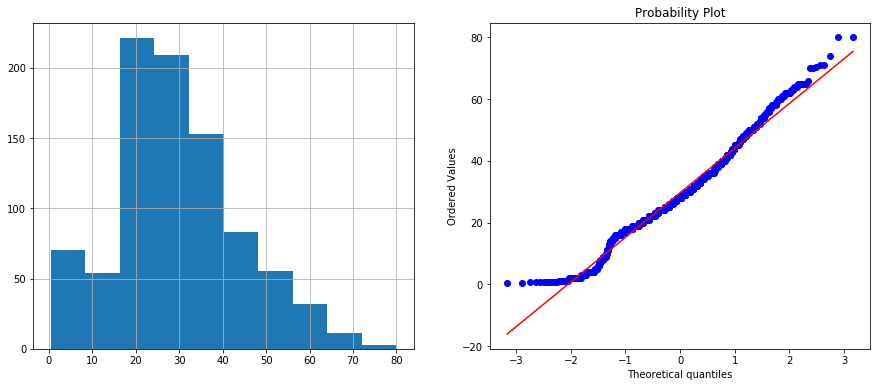

In [5]:
# plot the histograms to have a quick look at the distributions
# we can plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')

The variable Age is almost normally distributed, except for some observations on the lower value tail of the distribution. Note the slight skew to the left in the histogram, and the deviation from the straight line towards the lower values ont he Q-Q- plot. In the following cells, I will apply the above mentioned transformations and compare the distributions of the transformed Age.

### Logarithmic transformation

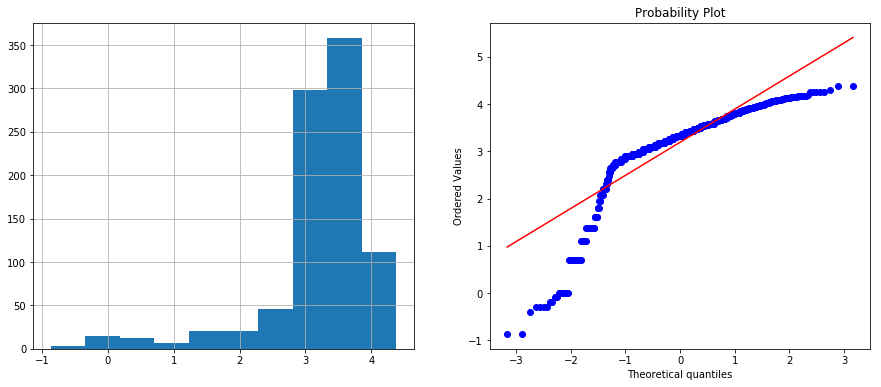

In [6]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

diagnostic_plots(data, 'Age_log')

The logarithmic transformation, did not render a Gaussian like distribution for Age.

### Reciprocal transformation

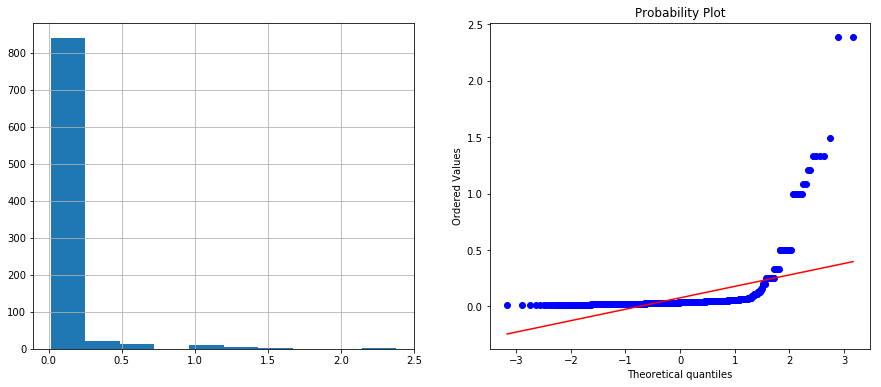

In [7]:
### Reciprocal transformation
data['Age_reciprocal'] = 1 / data.Age

diagnostic_plots(data, 'Age_reciprocal')

The reciprocal transformation was also not useful to transform Age into a variable normally distributed.

### Square root transformation

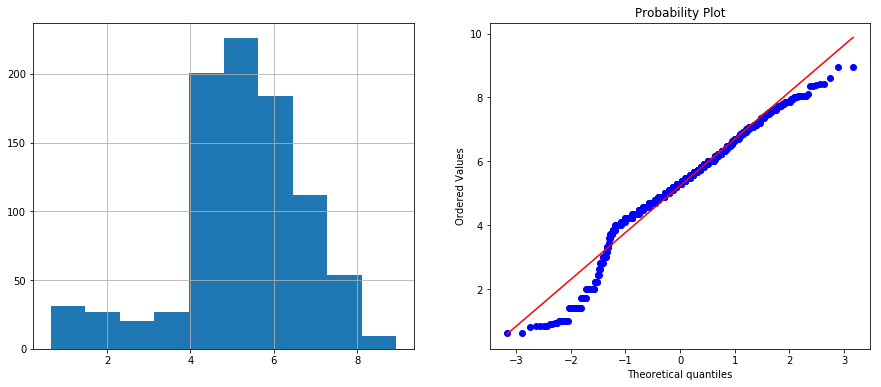

In [8]:
data['Age_sqr'] =data.Age**(1/2)

diagnostic_plots(data, 'Age_sqr')

The square root transformation is a bit more succesful that the previous2 transformations, however, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.

### Exponential

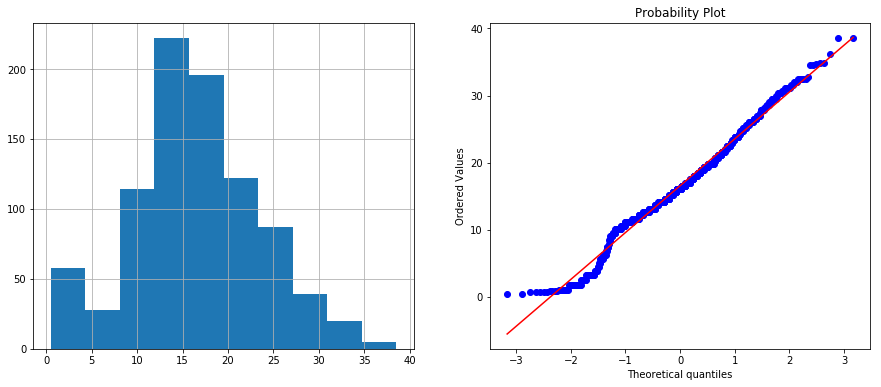

In [9]:
data['Age_exp'] = data.Age**(1/1.2) # you can vary the exponent as needed

diagnostic_plots(data, 'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed. Comparing the histogram and Q-Q plot of the exponentially transformed Age with the original distribution, I would say that by visual inspection the transformed variable follows more closely a Gaussian distribution. 

***Should I transform the variable?***

It depends on what we are trying to achieve. If this was a situation in a business setting, I would use the original variable without transformation to train the model, as this would represent a simpler situation at the time of asking developers to implement the model in real life, and also it will be easier to interpret. If on the other hand this was an exercise to win a data science competition, I would opt to use the variable that gives me the highest performance.


### BoxCox transformation

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Let's have a look.

Optimal λ:  0.764852250028


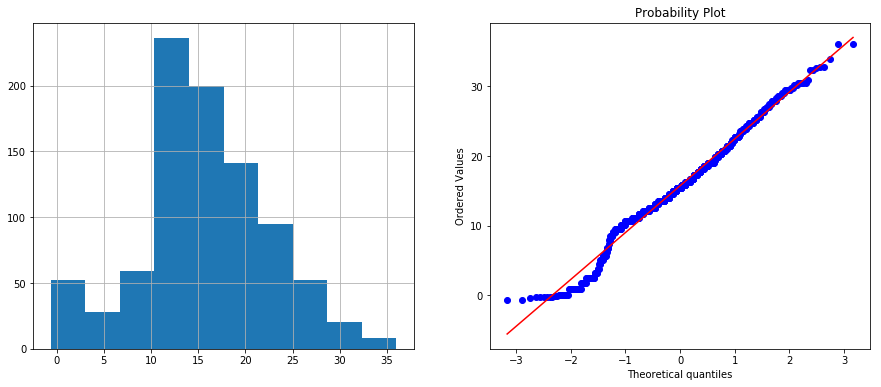

In [10]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'Age_boxcox')

The Box Cox transformation was as good as the exponential transformation we performed above to make Age look more Gaussian. Whether we decide to proceed with the original variable or the transformed variable, will depend of the purpose of the exercise as described above.

Let's check at another variable

## Fare

### Original distribution

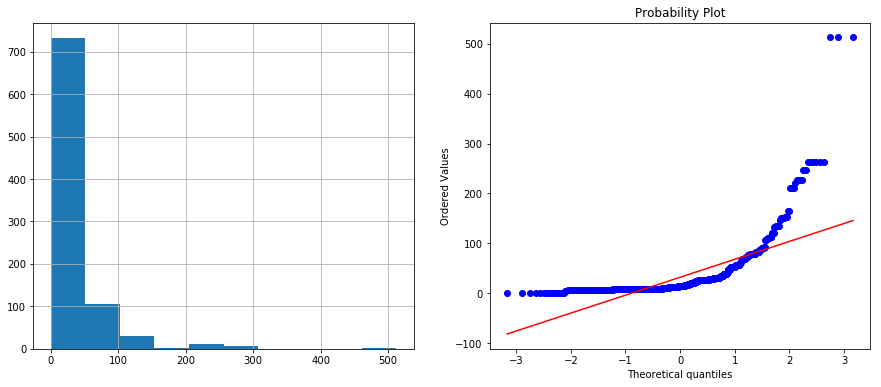

In [11]:
diagnostic_plots(data, 'Fare')

The variable Fare is very skewed, with the majority of the values accumulated on the lower Fare range, and just a few observations who paid a high Fare to get on the Titanic. As expected, in the Q-Q plot we observe a big deviation of the observed data from the 45 degree red line.

### Logarithmic transformation

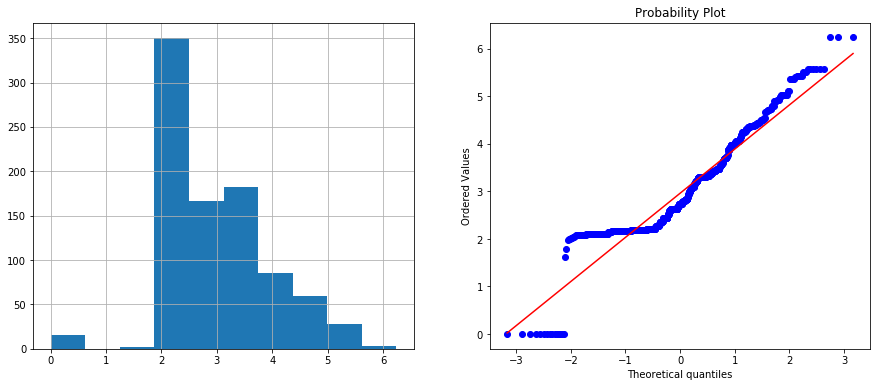

In [12]:
### Logarithmic transformation
data['Fare_log'] = np.log(data.Fare+1) # We don't want log of 0

diagnostic_plots(data, 'Fare_log')

The logarithmic transformation does a good job to make the variable Fare look more Gaussian. The histogram still shows signs of skewness and some observations deviate from the 45 degree line on the Q-Q plot, but by all means it is much more Gaussian looking than the original variable.

### Reciprocal transformation

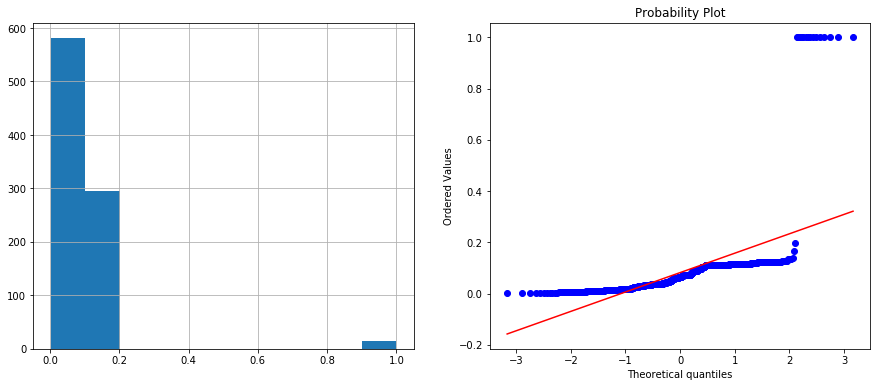

In [13]:
### Reciprocal transformation
data['Fare_reciprocal'] = 1 / (data.Fare+1)

diagnostic_plots(data, 'Fare_reciprocal')

The reciprocal transformation, on the other hand, is not useful to make Fare less skewed.

### Square root

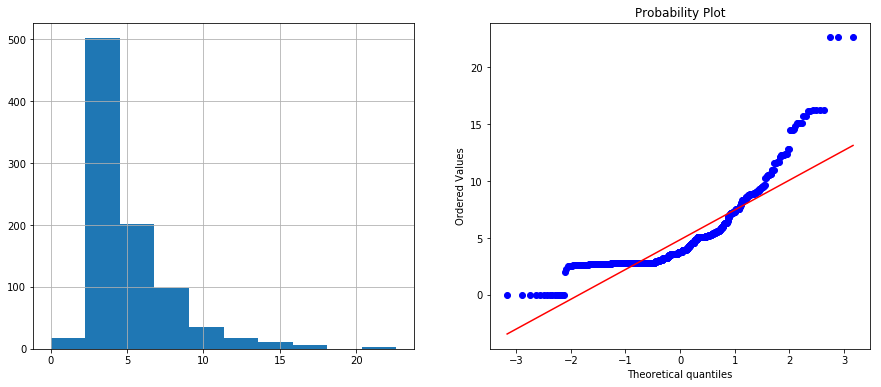

In [14]:
data['Fare_sqr'] =data.Fare**(1/2)

diagnostic_plots(data, 'Fare_sqr')

The square root transformation is not useful to make Fare more Gaussian looking.

### Exponential

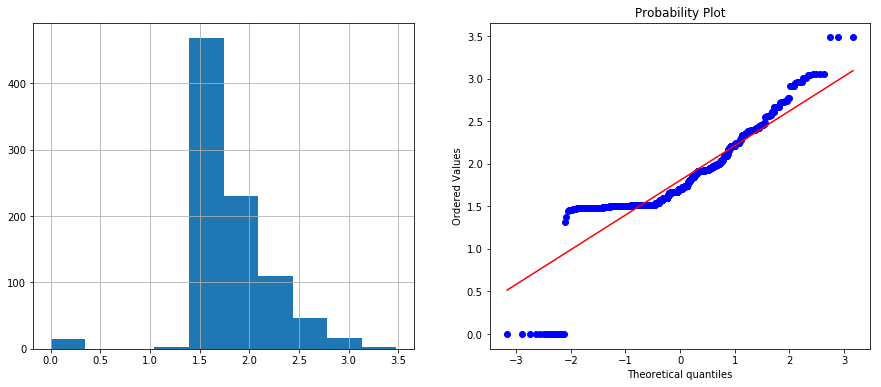

In [15]:
data['Fare_exp'] =data.Fare**(1/5)

diagnostic_plots(data, 'Fare_exp')

The exponential transformation works better than the last 2, perhaps as well as the logarithmic transformation.

### BoxCox

Optimal lambda:  -0.0977870289385


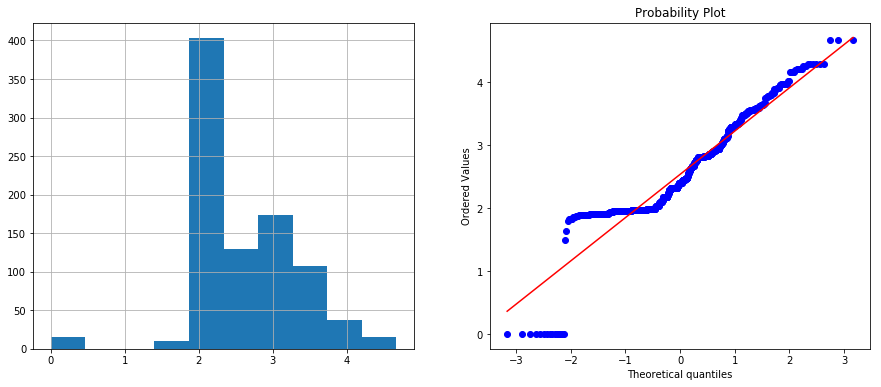

In [16]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')

We can see that after the transformation, the quantiles are somewhat more aligned over the 45 degree line with the theoreical quantiles of the Gaussian distribution.

For Fare, we could use the logarithmic, exponential or Box-Cox transformation to shape the variable into a transformed version that follows more closely (albeit not perfectly) a normal distribution. It is very likely that this transformation would improve the performance of many machine learning models, respect to using the variable Fare without transformation. Go ahead and test this transformation on a few machine learning algorithms, using the original Fare and the transformed version for comparison.